# WORLD_COVID_ANALYSIS_2020

COVID 2020 ANALYSIS AND PREDICTION:
Source: WHO global data on COVID 2020.
There are 18702 observations and 8 attributes in this dataset as on 2020-05-31 
Date_reported          0
Country_code          79
Country                0
WHO_region           117
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64
Drop the attributes with null value as we dont need them for further analysis.

          Date_reported      Country  New_cases  Cumulative_cases  New_deaths  \
0  2020-02-24T00:00:00Z  Afghanistan          1                 1           0   
1  2020-02-25T00:00:00Z  Afghanistan          0                 1           0   
2  2020-02-26T00:00:00Z  Afghanistan          0                 1           0   
3  2020-02-27T00:00:00Z  Afghanistan          0                 1           0   
4  2020-02-28T00:00:00Z  Afghanistan          0                 1           0   
5  2020-02-29T00:00:00Z  Afghanistan          0                 1 

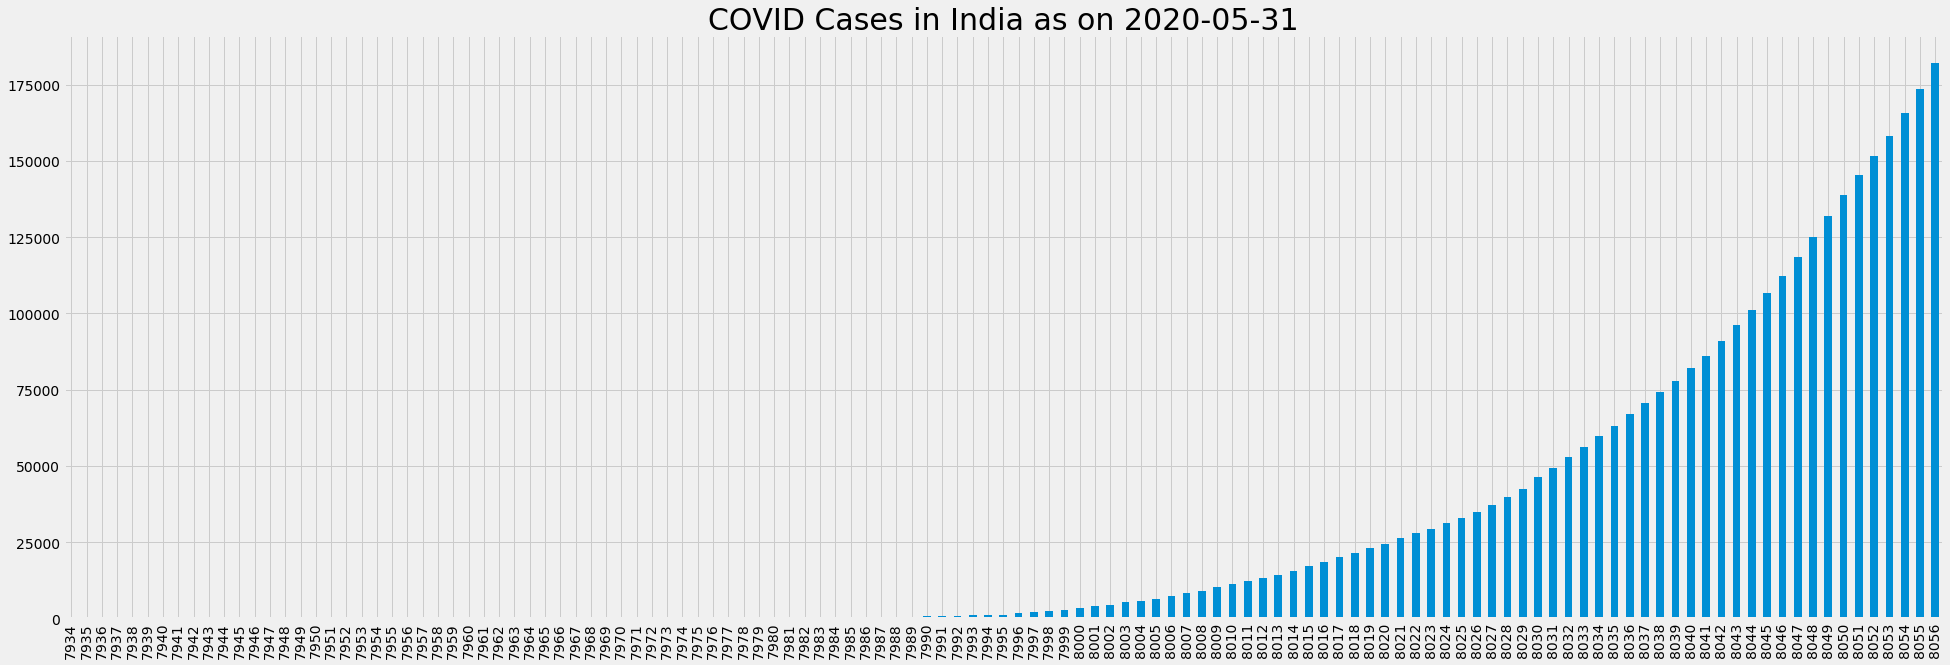

COVID Cases will rise in India as per this curve.


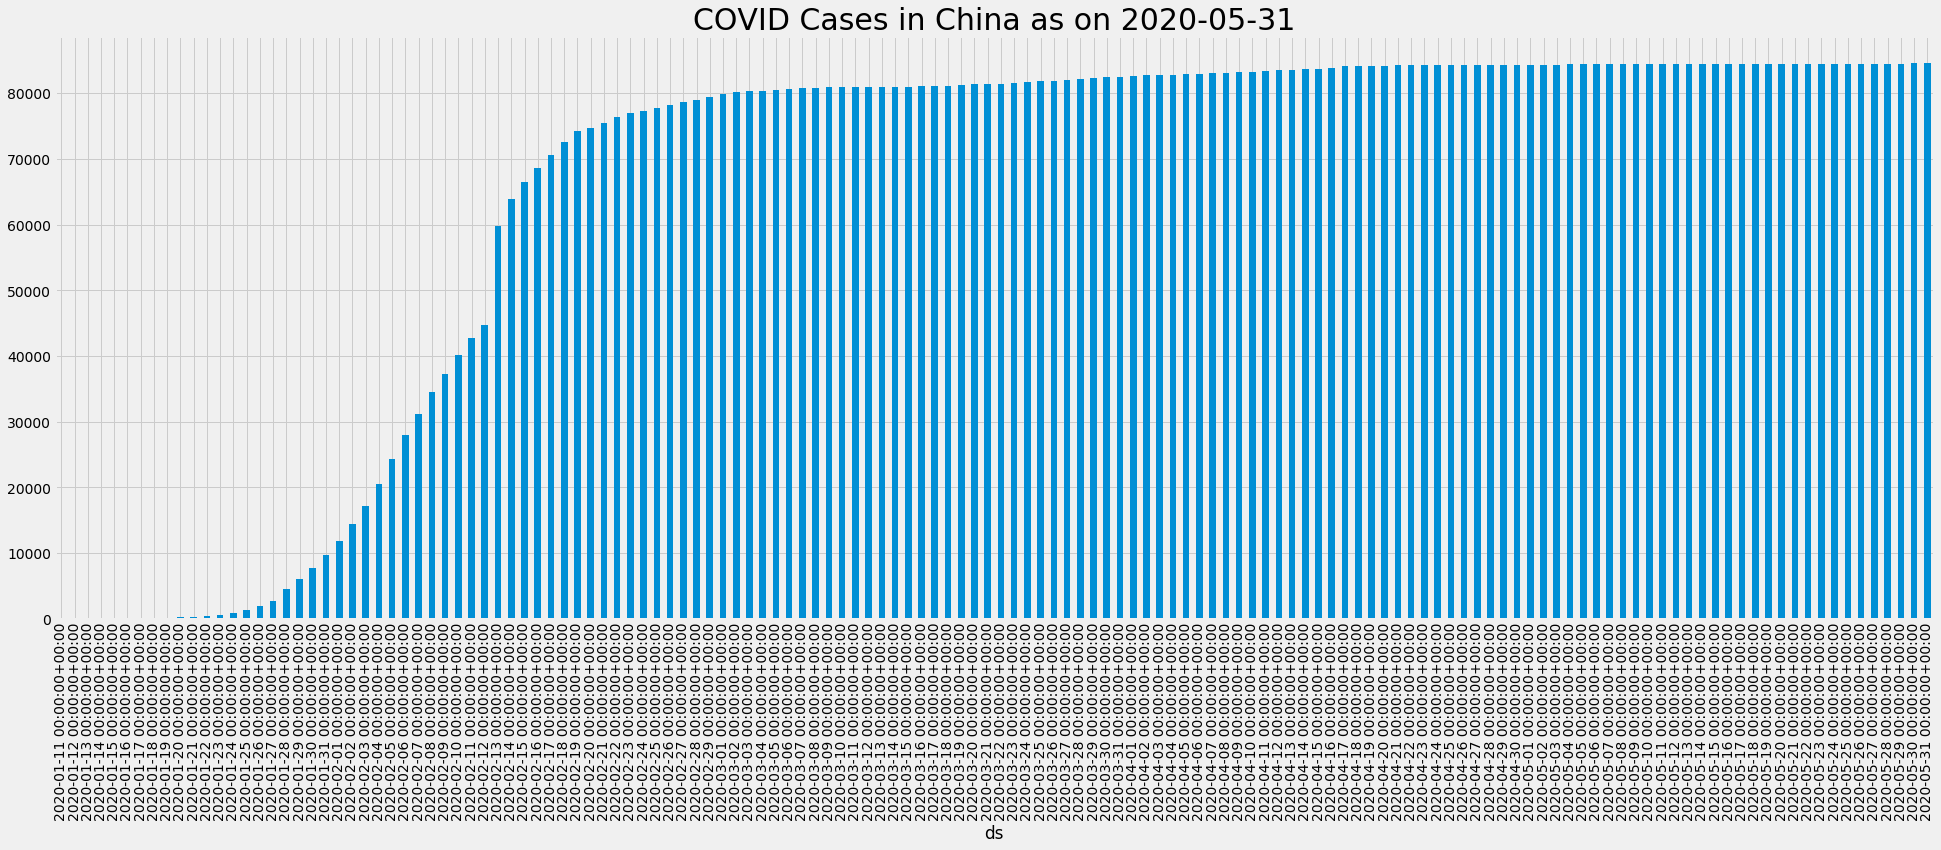

COVID Cases Curve has flattened in China. So lockdown has been lifted in China.


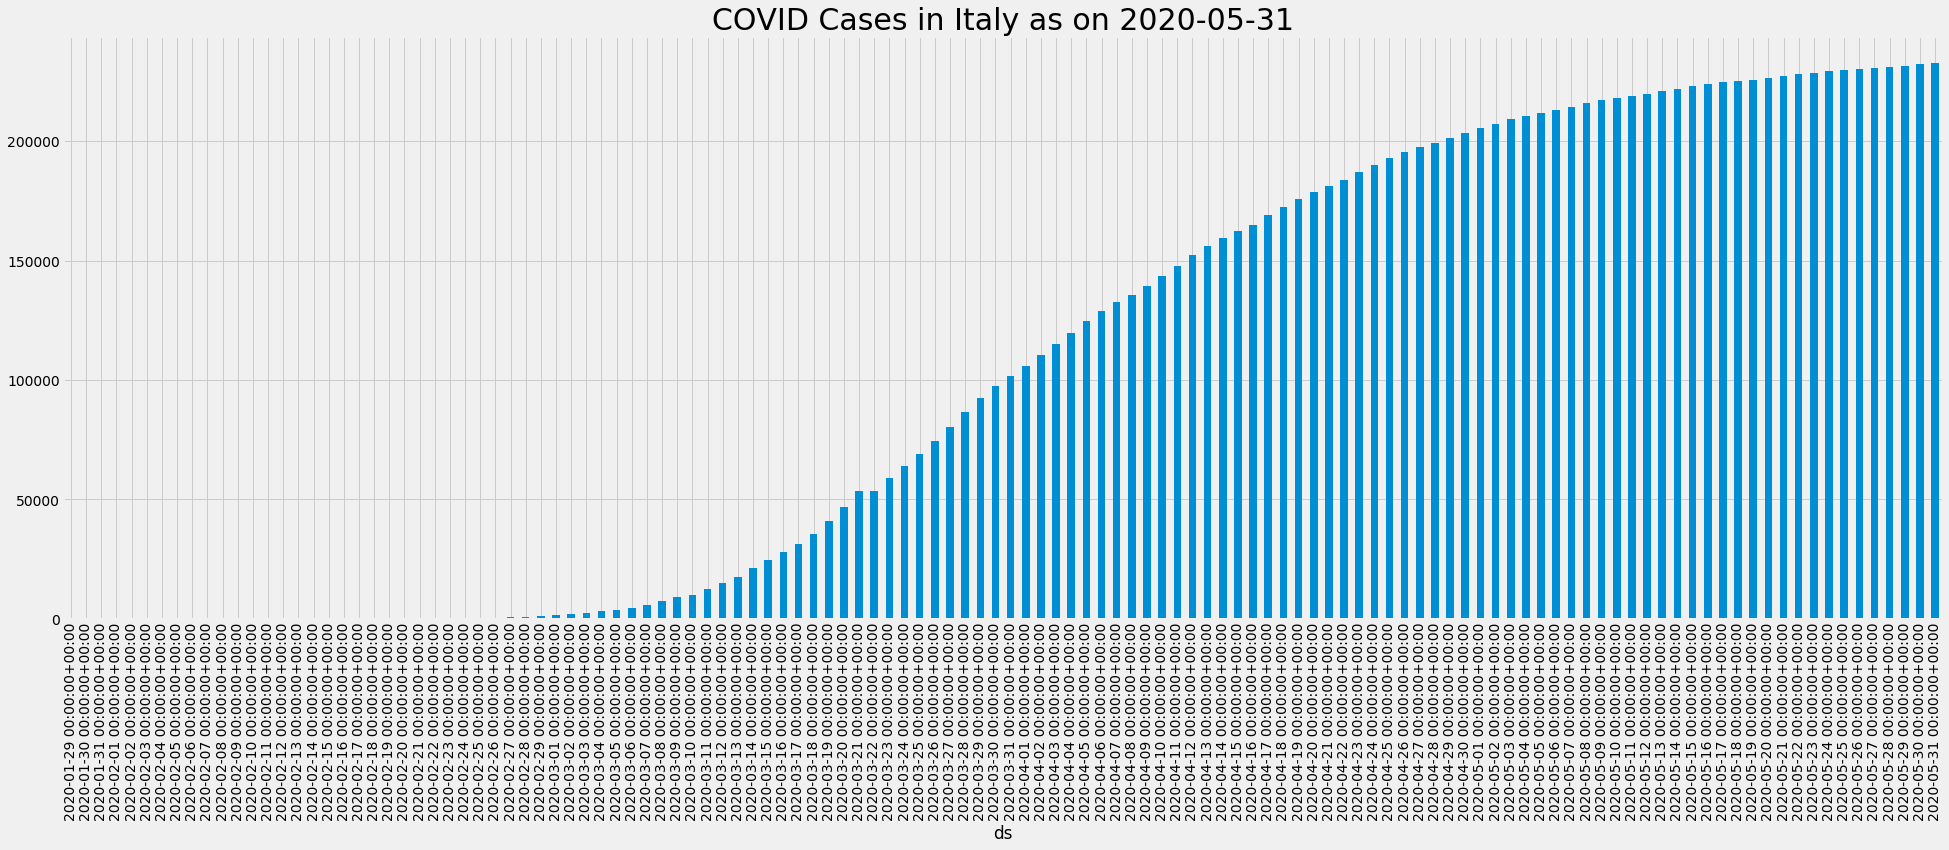

COVID Cases will rise marginally in Italy but it is showing initial signs that the curve will begin to faltten in Italy.
Country names starting with U:  ['Uganda' 'Ukraine' 'United Arab Emirates' 'United Republic of Tanzania'
 'United States of America' 'United States Virgin Islands' 'Uruguay'
 'Uzbekistan']


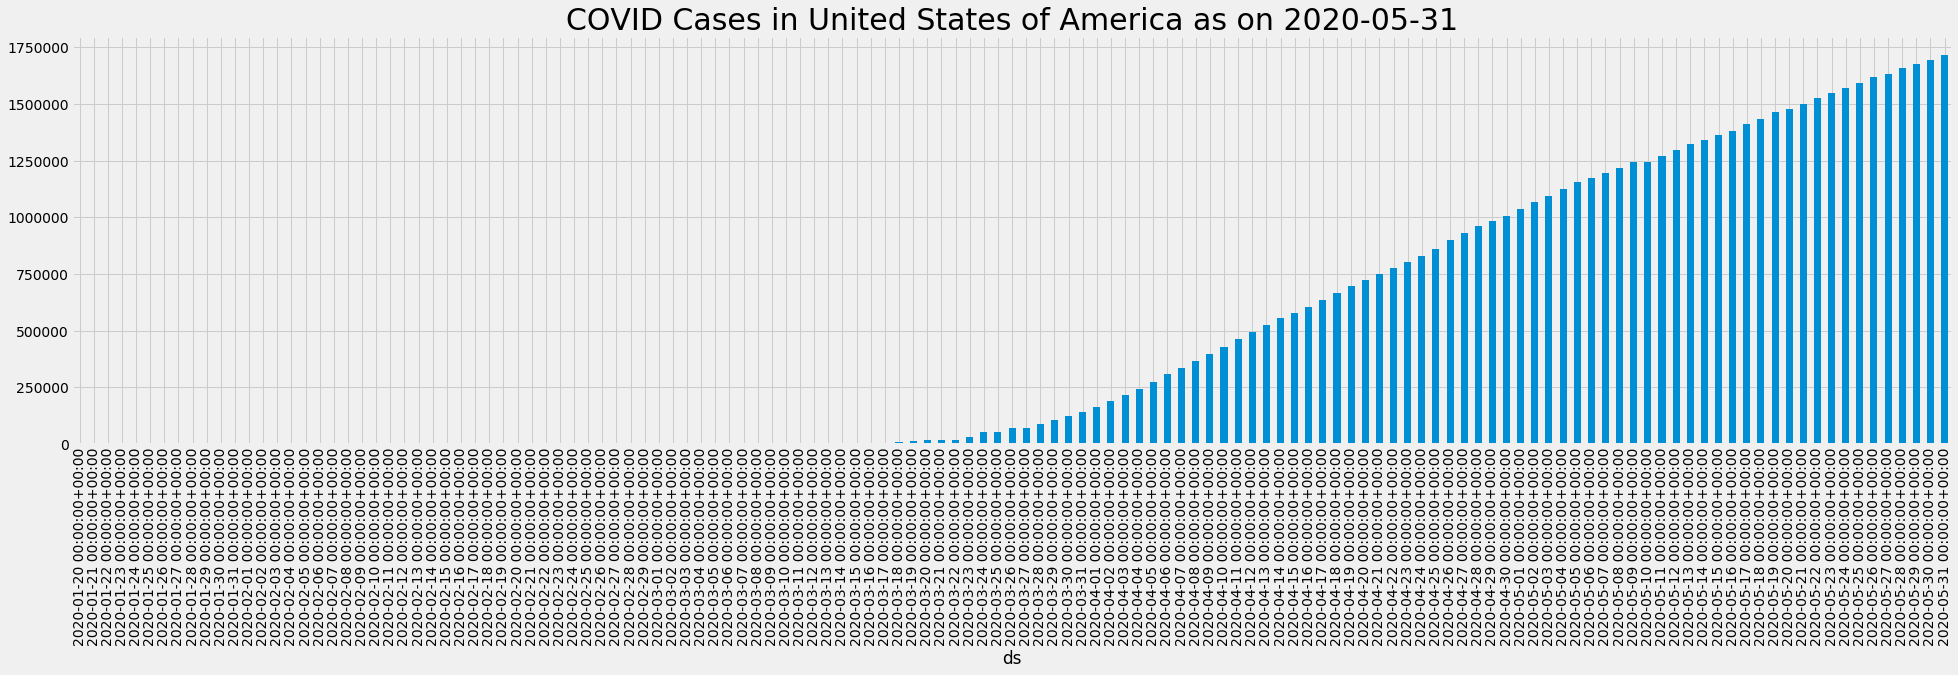

COVID Cases will rise in USA.
Country names starting with B:  ['Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonaire, Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi']


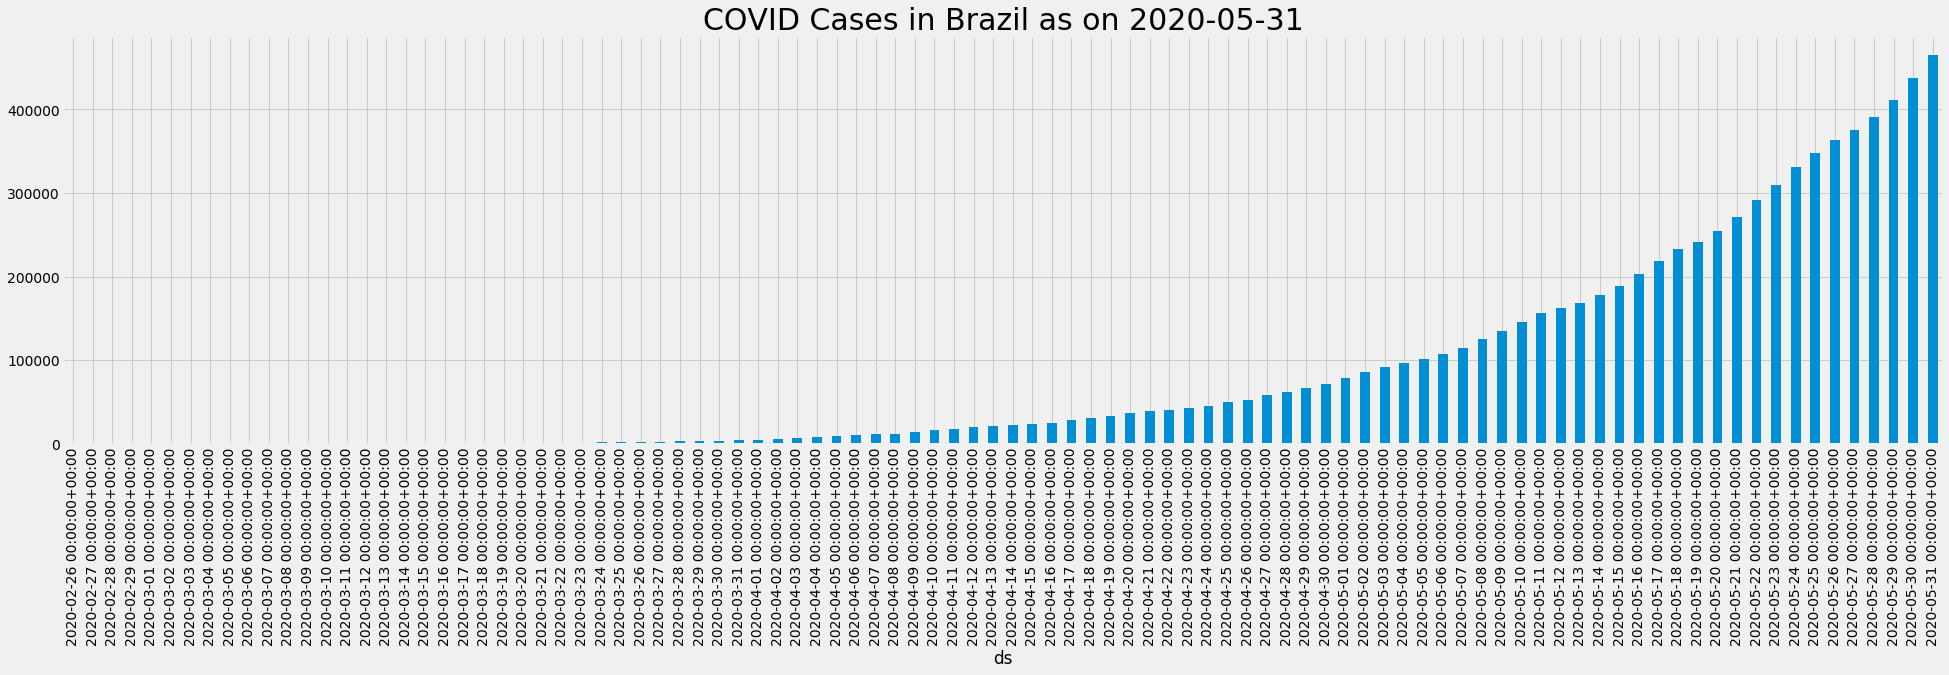

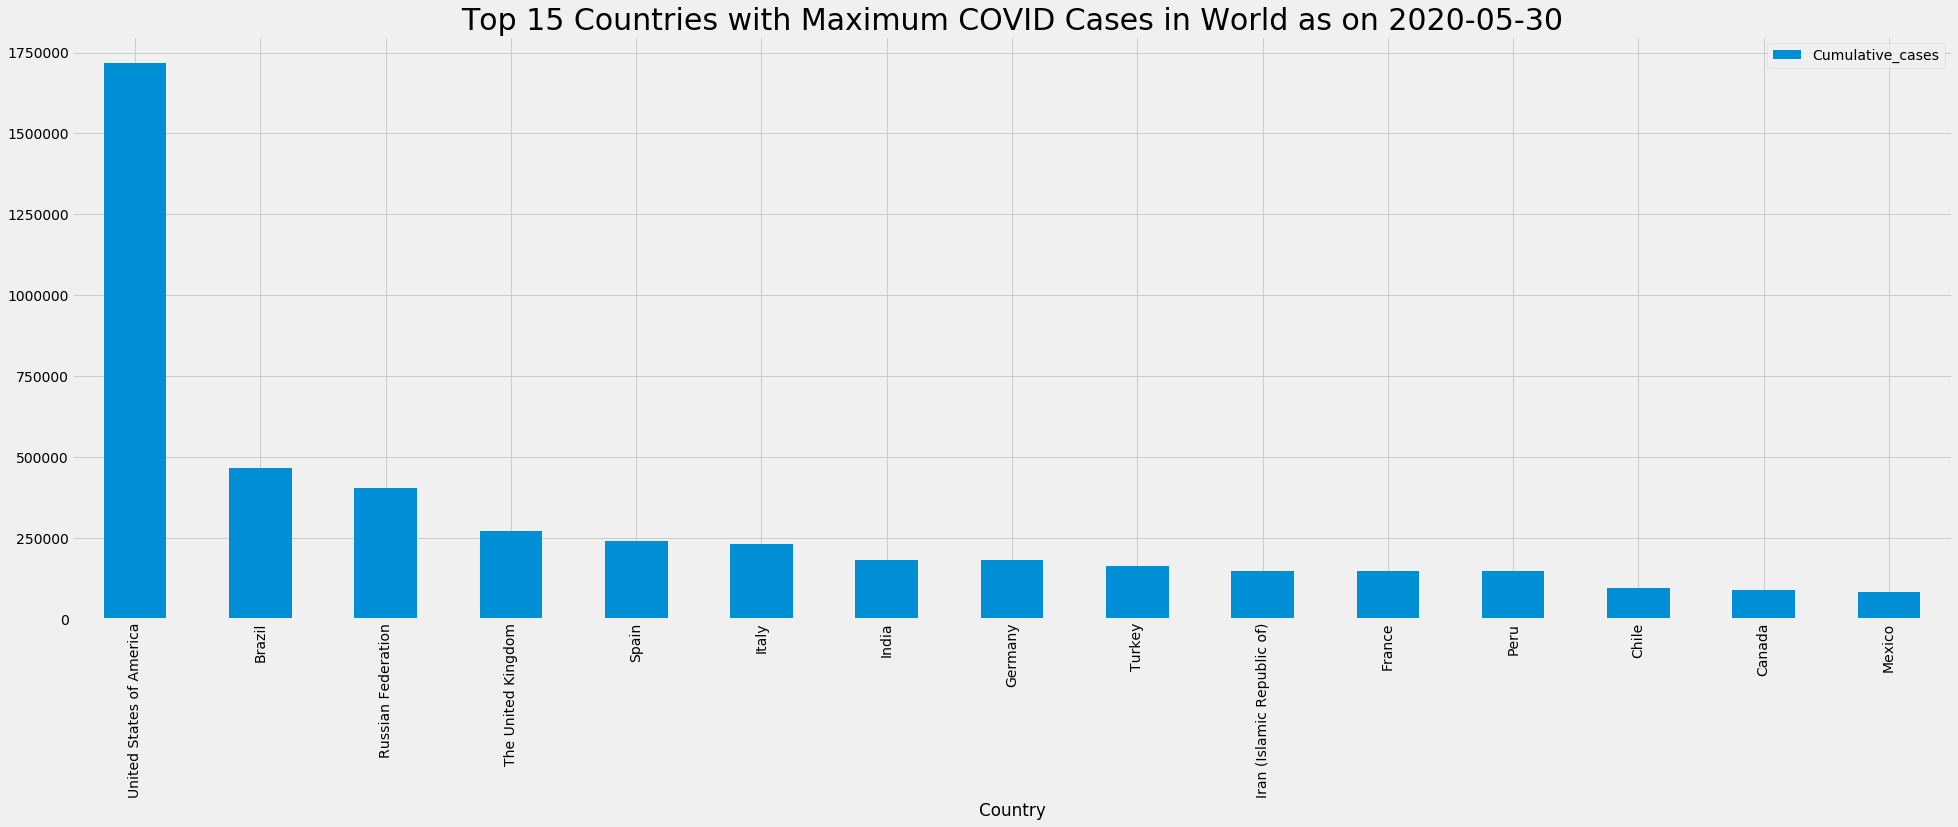

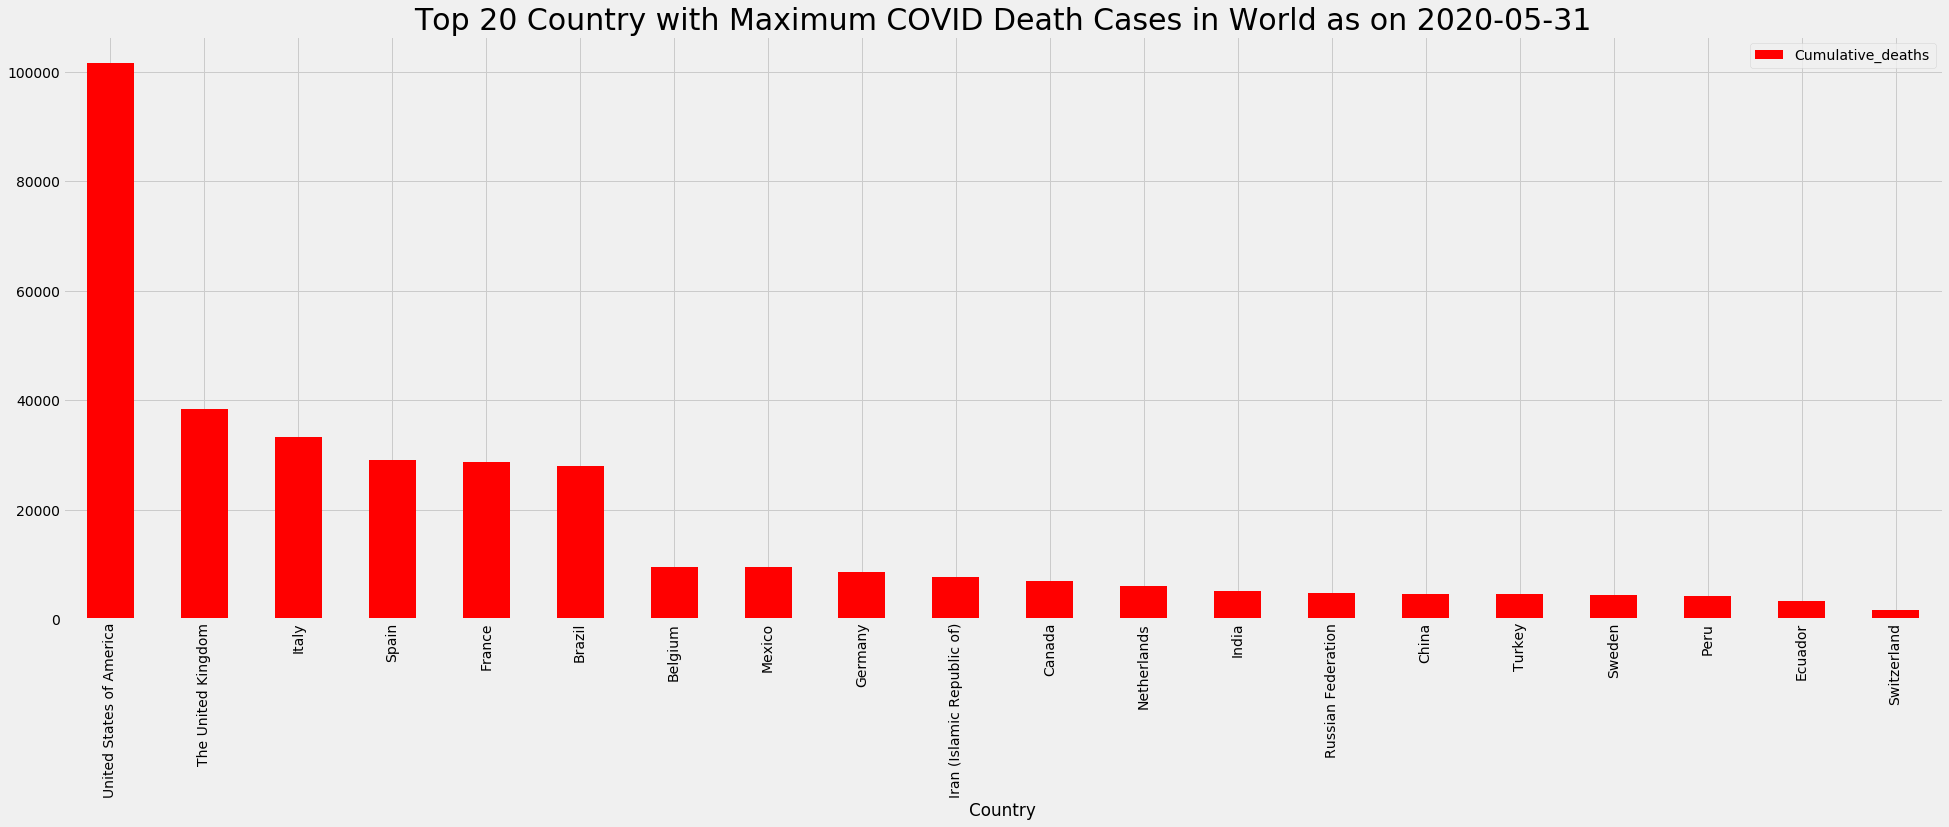

Country with Maximum Cases:                            New_cases  Cumulative_cases  New_deaths  \
Country                                                             
United States of America      21214           1716078        1263   

                          Cumulative_deaths  
Country                                      
United States of America             101567  


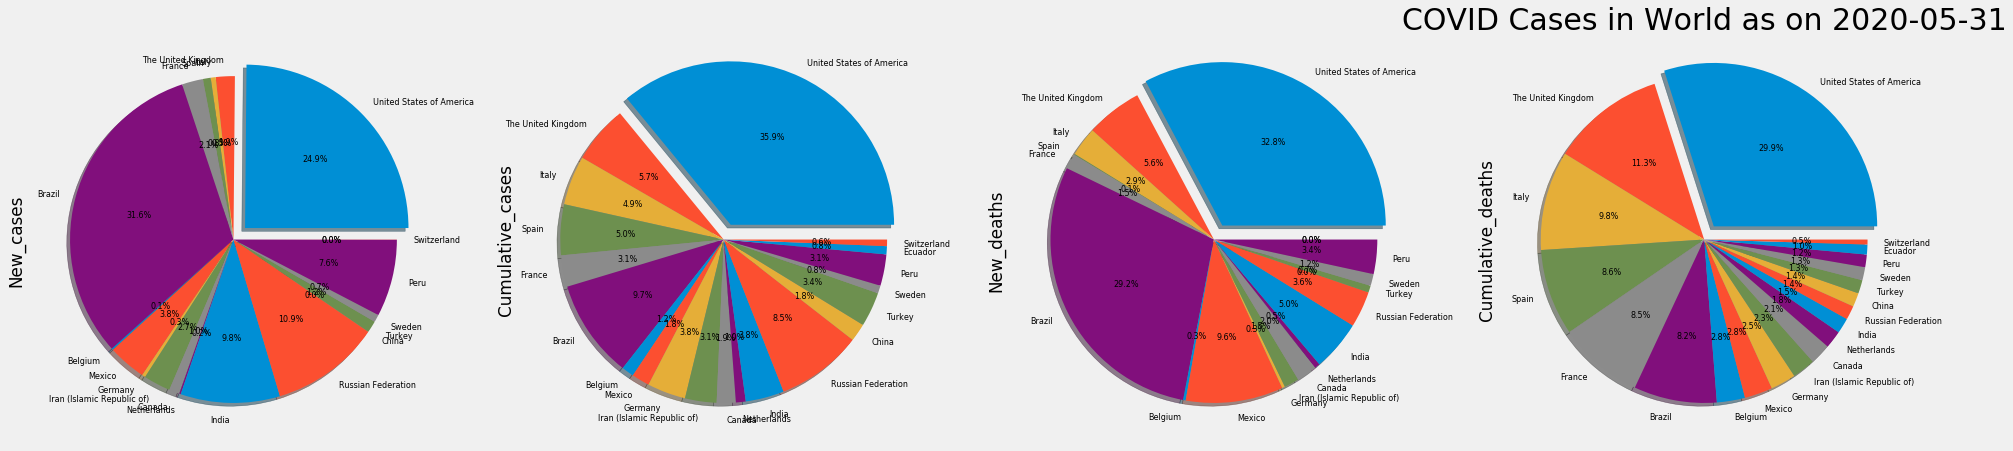

                            New_cases  Cumulative_cases  New_deaths  \
Country                                                               
Brazil                          26928            465166        1124   
United States of America        21214           1716078        1263   
Russian Federation               9268            405843         138   
India                            8380            182143         193   
Peru                             6506            148285         131   
Chile                            4220             94858          53   
Mexico                           3227             84627         371   
Pakistan                         3039             69496          88   
Qatar                            2355             55262           0   
Iran (Islamic Republic of)       2282            148950          57   

                            Cumulative_deaths  
Country                                        
Brazil                                  27878  
Uni

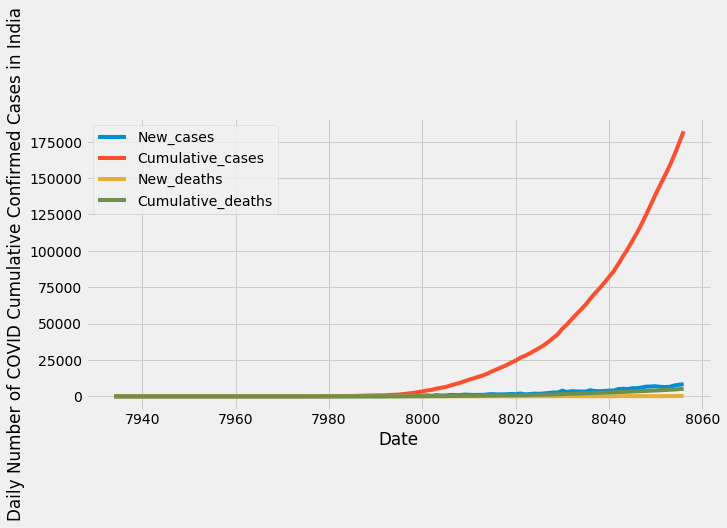

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Current vs. Predicted COVID Cases in India:
   2020-05-31  2020-06-30
0      182143    318312.0


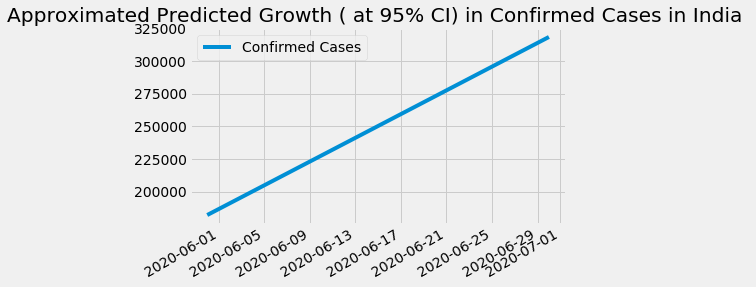

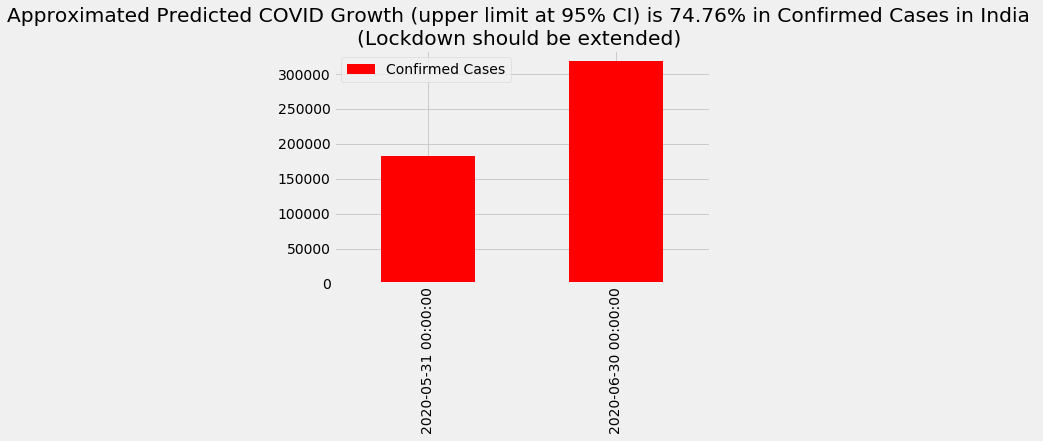

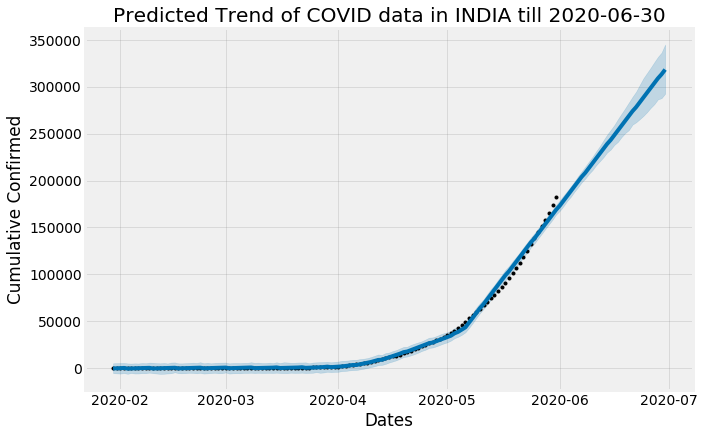

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
from fbprophet import Prophet
import plotly.express as px
import numpy as np
plt.style.use('fivethirtyeight')
print('COVID 2020 ANALYSIS AND PREDICTION:')
print('Source: WHO global data on COVID 2020.')
df=pd.DataFrame(pd.read_csv('WHO-COVID-19-global-data-12.csv'))
print(f'There are {df.shape[0]} observations and {df.shape[1]} attributes in this dataset as on {dt.date.today()} ')
print(df.apply(lambda x: x.isna().sum()))
print('Drop the attributes with null value as we dont need them for further analysis.\n')
df.drop(columns=['Country_code','WHO_region'],inplace=True)
print(df.head(10))
print('\nCount of Unique Values:')
print(df.nunique())
print('\nThe datatype of Attributes: ')
print(df.info())
print('\nThe datatype of date is Object: Need to convert it to datetime ')
dfT=df.copy()
print(f'This dataset has data about {df.Country.nunique()} unique countries in world')
#renaming column name
df.rename(columns={'Date_reported':'ds'},inplace=True)
#changing data type
df['ds']=pd.to_datetime(df['ds'])
print(df.info())
df.set_index('ds',inplace=True)
#Graphs

# Analysis considering by Countries - Extraction by Country name
df_India=dfT[dfT['Country']=='India']
df_India.set_index('Date_reported')
#Visualizing COVID Cases

#Bar chart of India's COVID Cases
plt.figure(figsize=(30,10))
df_India['Cumulative_cases'].plot(kind='bar')
plt.title(f'COVID Cases in India as on {dt.date.today()}',fontsize=30)
plt.show()

#Using rangeSlider
s=' India COVID Cumulative Confirmed '+str(dt.date.today())
fig = px.line(df_India, x=df_India.index.values, y='Cumulative_cases', title=s)
fig.update_xaxes(rangeslider_visible=True)
fig.show()
print('COVID Cases will rise in India as per this curve.')

# Visualizing China's COVID Cases
plt.figure(figsize=(30,10))
df[df['Country']=='China']['Cumulative_cases'].plot(kind='bar')
plt.title(f'COVID Cases in China as on {dt.date.today()}',fontsize=30)
plt.show()

df_China=df[df['Country']==('China')]
fig = go.Figure([go.Scatter(x=df_China.index, y=df_China['Cumulative_cases'])])
fig.show()
print('COVID Cases Curve has flattened in China. So lockdown has been lifted in China.')

## Visualizing Italy's COVID Cases
plt.figure(figsize=(30,10))
df[df['Country']=='Italy']['Cumulative_cases'].plot(kind='bar')
plt.title(f'COVID Cases in Italy as on {dt.date.today()}',fontsize=30)
plt.show()
print('COVID Cases will rise marginally in Italy but it is showing initial signs that the curve will begin to faltten in Italy.')

# Visualizing USA's COVID Cases
print('Country names starting with U: ',df[df['Country'].str.startswith('U')]['Country'].unique())

def plot_COVID_graph(country):
    plt.figure(figsize=(30,7))
    df[df['Country']==country]['Cumulative_cases'].plot(kind='bar')
    plt.title(f'COVID Cases in {country} as on {dt.date.today()}',fontsize=30)
    plt.show()
    
plot_COVID_graph('United States of America')
print('COVID Cases will rise in USA.')

# Visualizing Brazil's COVID Cases
print('Country names starting with B: ',df[df['Country'].str.startswith('B')]['Country'].unique())
    
plot_COVID_graph('Brazil')

# Analysis considering all Countries as on Today- Extraction by Date
df_Today = pd.DataFrame(dfT[dfT['Date_reported']==dfT.iloc[df.shape[0]-1]['Date_reported']])
df_Today.set_index('Country',inplace=True)
df_Today.drop(columns=['Date_reported'],inplace=True)

#Top 15 Cities with Maximum COVID Cases - Worst Hit Countries
df_Today.sort_values(by='Cumulative_cases',ascending=False)[:15].plot(kind='bar',y='Cumulative_cases',figsize=(30,10))
plt.title(f'Top 15 Countries with Maximum COVID Cases in World as on {dt.date.today()-dt.timedelta(1)}',fontsize=30)
plt.show()

#Top 15 Cities with Maximum COVID Cases
df_Today.sort_values(by='Cumulative_deaths',ascending=False)[:20].plot(kind='bar',
                                    y='Cumulative_deaths',figsize=(30,10),color='red')
plt.title(f'Top 20 Country with Maximum COVID Death Cases in World as on {dt.date.today()}',fontsize=30)
plt.grid(True)
plt.show()

print('Country with Maximum Cases: ',df_Today[df_Today['Cumulative_cases']==df_Today['Cumulative_cases'].max()])

#Pie Chart
a=np.zeros(20)
a[0]=.1
df_Today.sort_values(by='Cumulative_deaths',ascending=False)[:20].plot(kind='pie',                                                                                                       
                                    subplots=True,figsize=(30,40),                                                                                                      
                                    label= f'COVID Cases in World as on {dt.date.today()}',
                                    explode=a , fontsize=8 ,autopct='%1.1f%%',shadow = True, startangle=0,
                                    legend=False )
plt.title(f'COVID Cases in World as on {dt.date.today()}',fontsize=30)
plt.grid(True)
plt.show()

#MultiParameter Sorting
df_Today.sort_values(by=['New_cases','Country'],axis=0,inplace=True,ascending=False)
print(df_Today.head(10))

# Choloropleth Map for World - Highlighting COVID Death CASE COUNT

dfM = dfT
dfM['Date_reported'] = pd.to_datetime(dfM['Date_reported'])

total_list = dfM.groupby('Country').sum()['Cumulative_deaths']

country_list = dfM["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Reported Death Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Death Covid-19 Cases',
    geo=dict(
        showcoastlines=True,
    ),
)
s='first_figure'+str(dt.datetime.now())+'.html'
fig.write_html(s, auto_open=True)

#Case Study 3: Base Model for Time Series Prediction of COVID Cases in India
## Time Series Prediction of Covid Cases in India
ax = df_India.plot(figsize=(10, 5))
ax.set_ylabel('Daily Number of COVID Cumulative Confirmed Cases in India')
ax.set_xlabel('Date')
plt.show()
df_India.reset_index(inplace=True)
df_temp=df_India.filter(['Date_reported','Cumulative_cases'])
df_temp.rename(columns={'Date_reported':'ds'},inplace=True)
df_temp.rename(columns={'Cumulative_cases':'y'},inplace=True)
df_temp['ds']=pd.to_datetime(df_temp['ds'])
df_temp['ds']=df_temp['ds'].dt.date
my_model = Prophet(interval_width=0.95)
my_model.fit(df_temp)
future_dates = my_model.make_future_dataframe(periods=30, freq='D')
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
df_bar=pd.DataFrame(data=[df_India.iloc[df_India.shape[0]-1]['Cumulative_cases']],columns=['Current'])
df_bar_p=pd.DataFrame(data=[np.ceil(forecast.iloc[forecast.shape[0]-1]['yhat'])],columns=['Predicted'])
print('Current vs. Predicted COVID Cases in India:')
df_bar = pd.concat([df_bar, df_bar_p],axis='columns')
df_bar.rename(columns={'Current':pd.to_datetime('31-05-20'),'Predicted':pd.to_datetime('30-06-20')},inplace=True)
print(df_bar)
df_bar = df_bar.transpose()
df_bar.rename(columns={0:'Confirmed Cases'},inplace=True)
df_bar.plot(kind='line',title='Approximated Predicted Growth ( at 95% CI) in Confirmed Cases in India ')
plt.show()
rate = round((df_bar['Confirmed Cases'][1]-df_bar['Confirmed Cases'][0])*100/(df_bar['Confirmed Cases'][0]),2)

df_bar.plot(kind='bar',
title=f'Approximated Predicted COVID Growth (upper limit at 95% CI) is {rate}% in Confirmed Cases in India \n(Lockdown should be extended) ',
           color='red')
plt.show()

# Visualization of Predicted Growth in COVID Cases in India
my_model.plot(forecast,uncertainty=True,xlabel='Dates',ylabel='Cumulative Confirmed')
s='Predicted Trend of COVID data in ' +('India ').upper() + str('till 2020-06-30')
plt.title(s)
plt.show()